# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [2]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [3]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

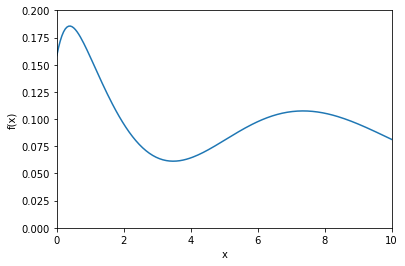

In [4]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [5]:
def genSample(npts):
    box = numpy.linspace(0, 10, 10**6)
    sample = []
    for i in box:
        if len(sample) < npts:
            m = 0.2
            r = random.random()
            x = random.random() * 10
            if m * r < f(x):
                sample.append(x)
        else:
            break
    return numpy.array(sample)

In [6]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


(array([0.163548 , 0.175428 , 0.1847835, 0.1910205, 0.185229 , 0.182358 ,
        0.18018  , 0.1740915, 0.1640925, 0.161865 , 0.1533015, 0.144639 ,
        0.1401345, 0.1321155, 0.1302345, 0.116523 , 0.1104345, 0.105237 ,
        0.1034055, 0.0966735, 0.0984555, 0.0847935, 0.0792   , 0.076329 ,
        0.0738045, 0.073854 , 0.0676665, 0.068904 , 0.070092 , 0.065538 ,
        0.064152 , 0.060093 , 0.0602415, 0.0619245, 0.0594   , 0.062172 ,
        0.0612315, 0.063162 , 0.0652905, 0.06435  , 0.0662805, 0.059697 ,
        0.065241 , 0.0705375, 0.072963 , 0.0747945, 0.075042 , 0.078111 ,
        0.0794475, 0.0803385, 0.0844965, 0.0845955, 0.086724 , 0.0886545,
        0.0872685, 0.0912285, 0.09405  , 0.096228 , 0.0952875, 0.0965745,
        0.0952875, 0.101871 , 0.106425 , 0.103455 , 0.106425 , 0.1055835,
        0.106326 , 0.108207 , 0.1063755, 0.1099395, 0.1094445, 0.110385 ,
        0.105435 , 0.10791  , 0.10296  , 0.1089   , 0.110187 , 0.109593 ,
        0.100584 , 0.1075635, 0.102168

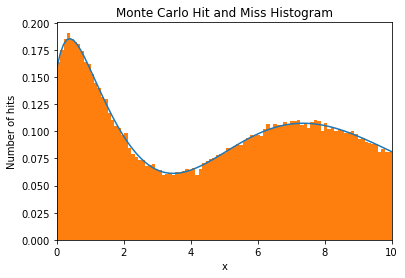

In [12]:
xs = numpy.linspace(0, 10, 100)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('Number of hits')
plt.xlabel('x')
plt.xlim(0,10)
plt.title('Monte Carlo Hit and Miss Histogram')


plt.hist(genSample(200000), bins = xs, density = True)